In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("/content/household_power_consumption.csv")

In [4]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...,...,...
1048570,13-12-2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13-12-2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13-12-2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13-12-2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [6]:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [7]:
sum = df["Sub_metering_3"].isnull().sum()

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
df["Global_active_power"] = df["Global_active_power"].astype(float)
df["Global_reactive_power"] = df["Global_active_power"].astype(float)
df["Sub_metering_1"] = df["Global_active_power"].astype(float)
df["Sub_metering_2"] = df["Global_active_power"].astype(float)

In [11]:
df["Voltage"] = df["Voltage"].astype("float")
df["Global_intensity"] = df["Global_intensity"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044506 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1044506 non-null  object 
 1   Time                   1044506 non-null  object 
 2   Global_active_power    1044506 non-null  float64
 3   Global_reactive_power  1044506 non-null  float64
 4   Voltage                1044506 non-null  float64
 5   Global_intensity       1044506 non-null  float64
 6   Sub_metering_1         1044506 non-null  float64
 7   Sub_metering_2         1044506 non-null  float64
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7), object(2)
memory usage: 79.7+ MB


In [13]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06
mean,1.108202e+00,1.108202e+00,2.399598e+02,4.718123e+00,1.108202e+00,1.108202e+00,5.933837e+00
std,1.129546e+00,1.129546e+00,3.284504e+00,4.763588e+00,1.129546e+00,1.129546e+00,8.210398e+00
min,7.600000e-02,7.600000e-02,2.234900e+02,2.000000e-01,7.600000e-02,7.600000e-02,0.000000e+00
25%,2.880000e-01,2.880000e-01,2.379700e+02,1.200000e+00,2.880000e-01,2.880000e-01,0.000000e+00
50%,5.500000e-01,5.500000e-01,2.402100e+02,2.400000e+00,5.500000e-01,5.500000e-01,0.000000e+00
75%,1.544000e+00,1.544000e+00,2.421400e+02,6.400000e+00,1.544000e+00,1.544000e+00,1.700000e+01
max,1.067000e+01,1.067000e+01,2.521400e+02,4.640000e+01,1.067000e+01,1.067000e+01,3.100000e+01


In [14]:
x = df.drop(["Voltage","Date","Time"],axis = 1)

In [15]:
x

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,4.216,18.4,4.216,4.216,17.0
1,5.360,5.360,23.0,5.360,5.360,16.0
2,5.374,5.374,23.0,5.374,5.374,17.0
3,5.388,5.388,23.0,5.388,5.388,17.0
4,3.666,3.666,15.8,3.666,3.666,17.0
...,...,...,...,...,...,...
1048570,0.426,0.426,1.8,0.426,0.426,0.0
1048571,0.424,0.424,1.8,0.424,0.424,0.0
1048572,0.422,0.422,1.8,0.422,0.422,0.0
1048573,0.422,0.422,1.8,0.422,0.422,0.0


In [16]:
y = df["Voltage"]

In [17]:
y

0          234.84
1          233.63
2          233.29
3          233.74
4          235.68
            ...  
1048570    242.27
1048571    242.10
1048572    241.73
1048573    242.56
1048574    242.61
Name: Voltage, Length: 1044506, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
x.iloc[:,:] = sc.fit_transform(x.iloc[:,:])

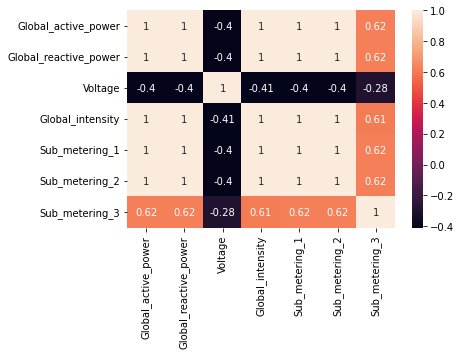

In [20]:
sns.heatmap(df.corr(),annot = True)

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 1) 

In [22]:
# step1 : Initialize the ann model
ann = Sequential()
# step 2 : add layer into model 
ann.add(Dense(units = 30, activation = "relu"))
ann.add(Dense(units = 1))

# step 3 : establish the connection between the layers 
ann.compile(optimizer = "adam", loss = "mse")

# step 4 : train the model
ann.fit(xtrain,ytrain,epochs = 30,validation_data=(xtest,ytest))


Epoch 1/30
26113/26113 [==============================] - 78s 3ms/step - loss: 2466.2615 - val_loss: 7.6071
Epoch 2/30
26113/26113 [==============================] - 69s 3ms/step - loss: 7.4113 - val_loss: 7.2040
Epoch 3/30
26113/26113 [==============================] - 94s 4ms/step - loss: 7.2446 - val_loss: 7.4837
Epoch 4/30
26113/26113 [==============================] - 96s 4ms/step - loss: 7.2125 - val_loss: 7.0936
Epoch 5/30
26113/26113 [==============================] - 80s 3ms/step - loss: 7.1942 - val_loss: 7.1384
Epoch 6/30
26113/26113 [==============================] - 72s 3ms/step - loss: 7.1807 - val_loss: 7.0836
Epoch 7/30
26113/26113 [==============================] - 76s 3ms/step - loss: 7.1763 - val_loss: 7.5145
Epoch 8/30
26113/26113 [==============================] - 68s 3ms/step - loss: 7.1712 - val_loss: 7.0700
Epoch 9/30
26113/26113 [==============================] - 68s 3ms/step - loss: 7.1676 - val_loss: 7.1316
Epoch 10/30
26113/26113 [===========================

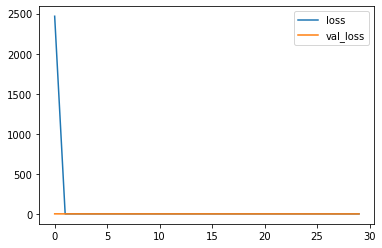

In [23]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [24]:
from tensorflow.keras.layers import Dropout

In [25]:
# step1 : Initialize the ann model
ann = Sequential()
# step 2 : add layer into model 
ann.add(Dense(units = 30, activation = "relu"))
ann.add(Dropout(rate = 0.5))
ann.add(Dense(units = 30, activation = "relu"))
ann.add(Dropout(rate = 0.5))
ann.add(Dense(units = 1))

# step 3 : establish the connection between the layers 
ann.compile(optimizer = "adam", loss = "mse")

# step 4 : train the model
ann.fit(xtrain,ytrain,epochs = 30,validation_data=(xtest,ytest))


Epoch 1/30
26113/26113 [==============================] - 82s 3ms/step - loss: 4046.7402 - val_loss: 150.2942
Epoch 2/30
26113/26113 [==============================] - 80s 3ms/step - loss: 2230.4004 - val_loss: 96.4309
Epoch 3/30
26113/26113 [==============================] - 96s 4ms/step - loss: 1787.5369 - val_loss: 71.8570
Epoch 4/30
26113/26113 [==============================] - 90s 3ms/step - loss: 1381.4644 - val_loss: 66.9969
Epoch 5/30
26113/26113 [==============================] - 91s 3ms/step - loss: 1073.4187 - val_loss: 60.2760
Epoch 6/30
26113/26113 [==============================] - 83s 3ms/step - loss: 803.4454 - val_loss: 47.8542
Epoch 7/30
26113/26113 [==============================] - 82s 3ms/step - loss: 574.5113 - val_loss: 29.0527
Epoch 8/30
26113/26113 [==============================] - 83s 3ms/step - loss: 384.5945 - val_loss: 21.0469
Epoch 9/30
26113/26113 [==============================] - 80s 3ms/step - loss: 234.9024 - val_loss: 15.9038
Epoch 10/30
26113/2611

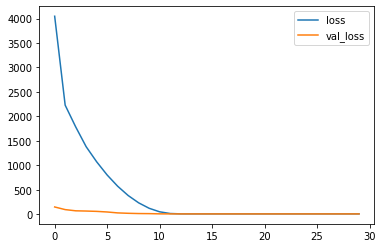

In [26]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [28]:
ann = Sequential()
# step 2 : add layer into model 
ann.add(Dense(units = 30, activation = "relu"))
ann.add(Dense(units = 1))

# step 3 : establish the connection between the layers 
ann.compile(optimizer = "adam", loss = "mse")



In [30]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor = "val_loss",min_delta = 0.01,patience = 5,verbose = 1)
ann.fit(xtrain,ytrain,epochs = 30,validation_data=(xtest,ytest),callbacks = [earlystopping])

Epoch 1/30
26113/26113 [==============================] - 68s 3ms/step - loss: 7.2115 - val_loss: 7.2779
Epoch 2/30
26113/26113 [==============================] - 75s 3ms/step - loss: 7.1985 - val_loss: 7.2060
Epoch 3/30
26113/26113 [==============================] - 67s 3ms/step - loss: 7.1830 - val_loss: 7.1651
Epoch 4/30
26113/26113 [==============================] - 70s 3ms/step - loss: 7.1694 - val_loss: 7.1214
Epoch 5/30
26113/26113 [==============================] - 71s 3ms/step - loss: 7.1517 - val_loss: 7.0900
Epoch 6/30
26113/26113 [==============================] - 66s 3ms/step - loss: 7.1227 - val_loss: 7.0506
Epoch 7/30
26113/26113 [==============================] - 70s 3ms/step - loss: 7.0544 - val_loss: 7.0600
Epoch 8/30
26113/26113 [==============================] - 68s 3ms/step - loss: 6.8922 - val_loss: 6.8831
Epoch 9/30
26113/26113 [==============================] - 74s 3ms/step - loss: 6.8780 - val_loss: 6.8408
Epoch 10/30
26113/26113 [==============================

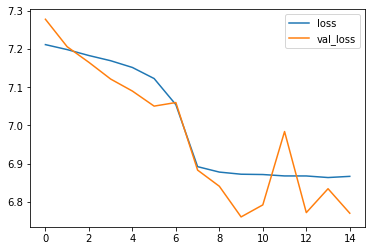

In [31]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()